# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Classroom'

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Classroom


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [29]:
dataset = datasets.load_iris()

x = dataset['data']
y = dataset['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [30]:
clf = svm.SVC(kernel = 'sigmoid', random_state=0)
scores = cross_validate(clf, x, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


In [31]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel='rbf', random_state=0)
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv)
print(scores.mean())

0.96


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [32]:
pca = PCA(n_components=3)
pca.fit(x)
x = pca.transform(x)

In [33]:
RFS = RandomForestClassifier(n_estimators=100)
scores = cross_validate(RFS, x, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.9133333333333333


In [34]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv)
print(scores.mean())

0.9266666666666667


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [35]:
mnist = datasets.load_digits()

x = mnist['data']
y = mnist['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

In [36]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[2159057.2910406236, 1914619.6175501016, 1730184.7025430463, 1609624.9227834668, 1517565.0059723475, 1404986.8264647238, 1336524.3662530663, 1264984.2808872391, 1202276.482000586, 1165177.713706215]


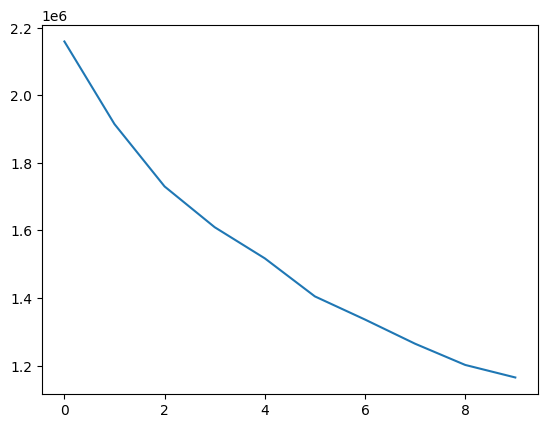

In [37]:
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, random_state = 0)
  kmeans.fit(mnist.data)
  clusters = kmeans.predict(mnist.data)
  kmeans.cluster_centers_.shape
  sse.append(kmeans.inertia_)
print(sse)
plt.plot(sse)

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [38]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_r = accuracy_score(y_test, y_pred)
precision_r = precision_score(y_test, y_pred, average= 'macro')
recall_r = recall_score(y_test, y_pred, average= 'macro')
f1_r = f1_score(y_test, y_pred, average= 'macro')

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn,average = 'macro')
recall_knn = recall_score(y_test, y_pred_knn,average = 'macro')
f1_knn = f1_score(y_test, y_pred_knn,average = 'macro')

In [40]:
NB = GaussianNB()
NB.fit(x_train, y_train) 
y_pred_nb = NB.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average = 'macro')
recall_nb = recall_score(y_test, y_pred_nb, average = 'macro')
f1_nb = f1_score(y_test, y_pred_nb,  average = 'macro')

In [41]:
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
scores1 = cross_val_score(rfc, x_val, y_val, cv=10, scoring='accuracy')
scores2 = cross_val_score(knn, x_val, y_val, cv=10, scoring='accuracy')
scores3 = cross_val_score(nb, x_val, y_val, cv=10, scoring='accuracy')

recordss = [('Random Forest',accuracy_r, precision_r,recall_r, f1_r,scores1.mean()), 
            ('NaiveBayes',accuracy_nb, precision_nb, recall_nb, f1_nb, scores3.mean()),
            ('KNN',accuracy_knn, precision_knn, recall_knn, f1_knn, scores2.mean()) ]

df3 = pd.DataFrame(data = recordss, columns = ['Algorithm','Accuracy', 'Precision', 'Recall',' f1', 'KMeans'])
df3

# print('Random Forest: ',scores1.mean())
# print('K Neighbors: ',scores2.mean())
# print('Naïve Bayes: ',scores3.mean())

,Algorithm,Accuracy,Precision,Recall,f1,KMeans
0,Random Forest,0.972222,0.973637,0.971309,0.971679,0.947222
1,NaiveBayes,0.875000,0.898553,0.876298,0.880317,0.822222
2,KNN,0.983333,0.984855,0.983316,0.983802,0.963889


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
Dựa trên kết quả trên: Mô hình học không giám sát (Unsupervised) tốt hơn.

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [42]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean',linkage='ward')
cluster.fit_predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([7, 9, 4, ..., 4, 1, 4])

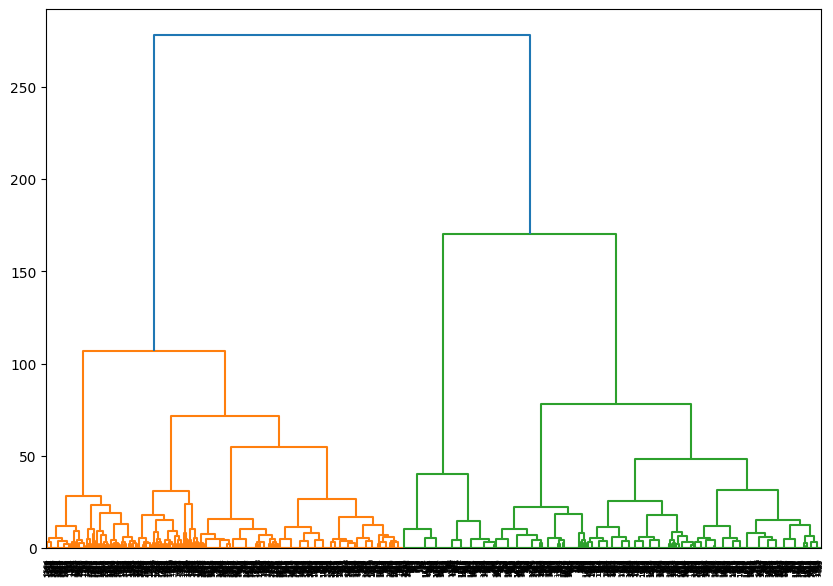

In [43]:
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(mnist.data[:, 1:4], method='ward'))

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [44]:
dataset = pd.read_csv('shopping-data.csv')

In [45]:
dataset_1 = dataset.iloc[:,2:5]
dataset_1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [46]:
kmeans = KMeans(random_state = 0)
kmeans.fit(dataset_1)
clusters = kmeans.predict(dataset_1)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(8, 3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[212840.1698209719, 143342.751571706, 104366.15145556197, 75350.77917248776, 58300.44332159069, 51084.505954934364, 44344.94980177718, 40953.73845841784]


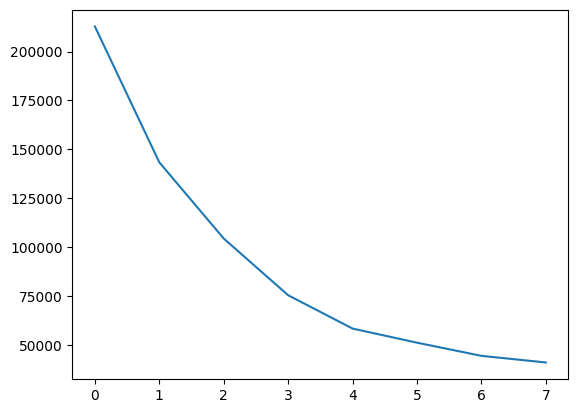

In [47]:
sse = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters = k, random_state = 0)
  kmeans.fit(dataset_1)
  clusters = kmeans.predict(dataset_1)
  kmeans.cluster_centers_.shape
  sse.append(kmeans.inertia_)
print(sse)
plt.plot(sse)

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [48]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean',linkage='ward')
cluster.fit_predict(dataset_1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7,
       0, 7, 0, 7, 0, 9, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 9,
       0, 9, 5, 9, 9, 9, 5, 9, 9, 5, 5, 5, 5, 8, 9, 5, 8, 4, 8, 5, 8, 4,
       5, 8, 4, 9, 8, 5, 8, 8, 8, 4, 5, 5, 4, 5, 8, 5, 8, 5, 4, 5, 5, 4,
       5, 5, 8, 4, 5, 5, 5, 4, 5, 4, 5, 4, 4, 5, 8, 4, 5, 4, 8, 5, 8, 8,
       8, 4, 5, 4, 4, 4, 8, 5, 5, 5, 4, 5, 5, 1, 4, 1, 2, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 3, 6, 3, 6, 3, 6, 3, 6, 1, 6, 3, 6, 1, 6, 3, 6, 3, 6, 3,
       6, 3])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

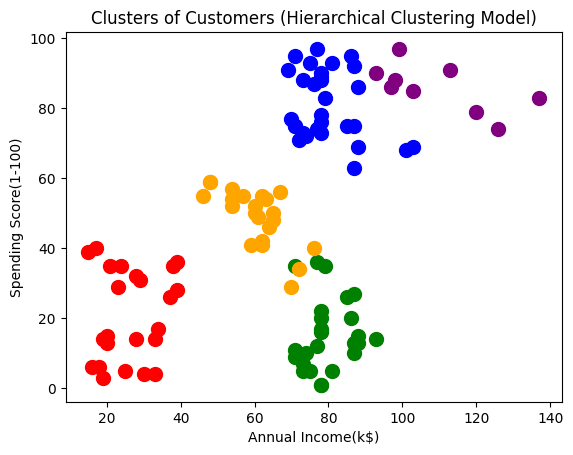

In [49]:
x = dataset.iloc[:, [3,4]].values
plt.scatter(x[cluster.fit_predict(dataset_1)==0, 0], x[cluster.fit_predict(dataset_1)==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x[cluster.fit_predict(dataset_1)==1, 0], x[cluster.fit_predict(dataset_1)==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[cluster.fit_predict(dataset_1)==2, 0], x[cluster.fit_predict(dataset_1)==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x[cluster.fit_predict(dataset_1)==3, 0], x[cluster.fit_predict(dataset_1)==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(x[cluster.fit_predict(dataset_1)==4, 0], x[cluster.fit_predict(dataset_1)==4, 1], s=100, c='orange', label ='Cluster 5')

plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.